In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score,recall_score,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('details.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
legal_transaction = data[data.Class == 0]
fraud_transaction = data[data.Class == 1]

In [7]:
print(legal_transaction.shape)
print(fraud_transaction.shape)
data.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [8]:
legal_sample = legal_transaction.sample(n=492*2)
legal_sample.shape

(984, 31)

In [9]:
new_dataset = pd.concat([legal_sample, fraud_transaction])

In [10]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
47789,43364.0,1.128693,-1.138381,1.132378,-0.549862,-1.632388,0.179427,-1.310265,0.323795,-0.221665,...,0.428058,1.106294,-0.106330,0.263518,0.266963,-0.050667,0.043454,0.023373,76.06,0
64104,51023.0,1.239714,0.205222,0.135555,0.997467,0.112142,0.074971,-0.078530,0.079049,0.219351,...,-0.112910,-0.319430,-0.061178,-0.819038,0.505552,-0.363056,0.031616,0.012924,4.90,0
143918,85725.0,1.236708,0.320017,-0.892980,1.312691,2.323113,3.723111,-0.450601,0.881448,-0.863353,...,-0.123277,-0.558825,-0.016722,0.977211,0.580502,-0.059172,-0.007054,0.018550,7.87,0
20338,30968.0,-1.442430,0.194908,1.000238,3.115011,-0.171374,0.607540,0.359559,0.515845,-1.261155,...,0.243438,0.246458,0.378970,-0.432781,-0.237989,0.221302,0.258030,0.067395,230.09,0
228387,145489.0,-2.502135,-2.518807,-0.181685,0.447624,3.553524,-2.474897,-0.896972,0.208330,0.367201,...,0.349969,0.064960,0.541870,0.534790,-0.049595,0.534392,-0.026759,0.269560,99.00,0


In [11]:
new_dataset['Class'].value_counts()

Class
0    984
1    492
Name: count, dtype: int64

In [12]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93533.081301,0.024220,0.119368,0.016077,0.041002,-0.030492,0.041825,0.010433,0.022024,0.095414,...,0.019414,-0.053055,-0.040735,0.014616,0.013921,-0.023701,0.009759,-0.003736,-0.008183,81.693953
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [14]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
47789    43364.0  1.128693 -1.138381  1.132378 -0.549862 -1.632388  0.179427   
64104    51023.0  1.239714  0.205222  0.135555  0.997467  0.112142  0.074971   
143918   85725.0  1.236708  0.320017 -0.892980  1.312691  2.323113  3.723111   
20338    30968.0 -1.442430  0.194908  1.000238  3.115011 -0.171374  0.607540   
228387  145489.0 -2.502135 -2.518807 -0.181685  0.447624  3.553524 -2.474897   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1476, 30) (1180, 30) (296, 30)


In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [20]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [21]:
y_pred = model.predict(X_test)
RFC_test_data_accuracy = accuracy_score(Y_test,y_pred)
RFC_precision = precision_score(Y_test, y_pred)
RFC_f1 = f1_score(Y_test, y_pred)
RFC_recall = recall_score(Y_test,y_pred)
classification_rep = classification_report(Y_test, y_pred)


In [22]:
print("Random Forest Classifier : ")
print("Accuracy : ",RFC_test_data_accuracy)
print("Precision : ",RFC_precision)
print("F1 : ",RFC_f1)
print("Recall : ",RFC_recall)
print(f'Classification Report:\n{classification_rep}')

Random Forest Classifier : 
Accuracy :  0.9695945945945946
Precision :  1.0
F1 :  0.9518716577540107
Recall :  0.9081632653061225
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       198
           1       1.00      0.91      0.95        98

    accuracy                           0.97       296
   macro avg       0.98      0.95      0.96       296
weighted avg       0.97      0.97      0.97       296



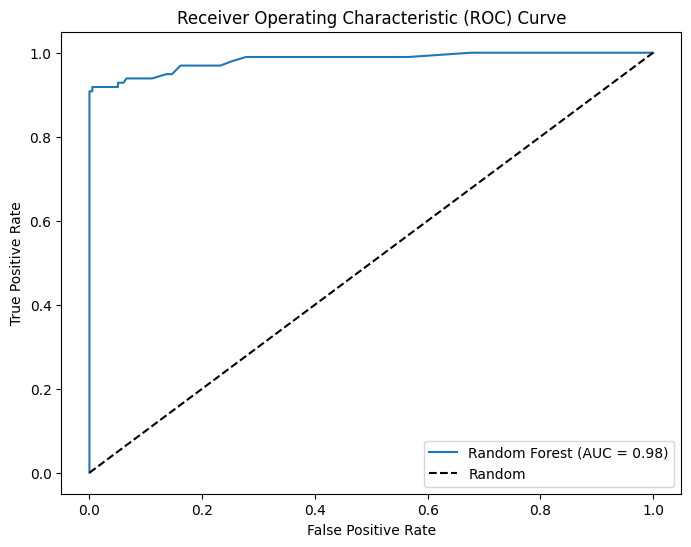

In [27]:

y_probabilities = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_probabilities)
auc = roc_auc_score(Y_test, y_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()